# Théorie de Press-Schechter et éffondrement a symétrie sphérique en cosmologie
------------------------------------------------------------------------------

Après avoir étudié les perturbations cosmologiques dans l'Univers primordial et simuler le CMB, je propose ici, d'étudier (très sommairement) ce qui se passe après l'ère du fond diffus cosmologique : La formation des grandes structures. 

Dans le cadre du modèle standard de la cosmologie, les surdensités primordiales sont amplifiées par la gravité. Elles s’effondrent donc pour former des halos de matière noire, au sein desquels le gaz tombe pour former les galaxies. Pourvoir quantifier l'effondrement de ces surdensités primordiales permet donc dans le principe de connaitre le rythme de formation des galaxies et amas de galaxies ainsi que leurs abondances. Nous effectuerons les calculs dans le cadre d’hypothèses simplifiées (effondrement sphérique, cosmologie EdS, $\Lambda$CDM...).

On considère une sphère homogène (densité de masse $\rho$ = $\frac{M}{V}$ avec M sa masse, V = $\frac{4}{3} \pi R^{3}$ le volume et R le rayon) dans un univers homogène (densité de masse $\rho_{m}$) en expansion. On définit la surdensité de la sphère par rapport au reste de l’univers comme $\delta$ = $\frac{\rho-\bar\rho_{m}}{\bar\rho_{m}}$ : si la sphère est plus dense que le reste de l’Univers alors δ > 0 et la surdensité va s’effondrer.
L’évolution temporelle de $\delta$ peut être déterminé en partant des équations de la gravité newtonienne : 
$$ F_{p} = -\frac{G m M}{r^{2}} = m \ddot r$$ où $$r = (\frac{3 M}{4 \pi \bar\rho_{m} (1+\delta)})^{\frac{1}{3}}$$

Ainsi, en déroulant le calcul, on tombe naturellment sur l'équation non-linéaire du $2^{nd}$ ordre suivante : 


$$\ddot \delta + 2 H \dot \delta = 4 \pi G \bar\rho_{m} (1+\delta) + \frac{4}{3} \frac{\dot \delta^{2}}{1+\delta}$$


# Résolution Numérique : 
On se place dans le cadre de la cosmologie EdS ($\Omega_{m} = 1$) la fonction d'Hubble est alors une simple fonction du temps et s'écrit $H(t) = \frac{2}{3 t}$ et le facteur d'échelle s'écrit $a(t) = \large(\frac{3 H_{0} t }{2}\large)^{\frac{2}{3}}$. 
La densité moyenne s'écrit : $\bar\rho_{m} = \rho_{c} a^{-3}$ où $\rho_{c} = \frac{3 H_{0}^{2}}{8 \pi G}$ est la densité critique. On peut maintenant calculer H(t) et $\bar\rho_{m}(t)$ comme une simple fonction du temps puis utiliser Odeint pour résoudre l'équation. 

On part d’une surdensité initiale $\delta_{i} << 1$ à un temps $t_{i} << \frac{1}{H_{0}}$ fixé et en supposant comme condition sur la dérivée $\dot \delta_{i} = H(t_{i}) \delta_{i}$ jusqu’à une surdensité finale importante ($\delta_{f} >> 100$) où l’on considère que la sphère s’est effondrée (correspondant à $\delta \longrightarrow +\infty$ ce qui numériquement n’est pas possible)

 




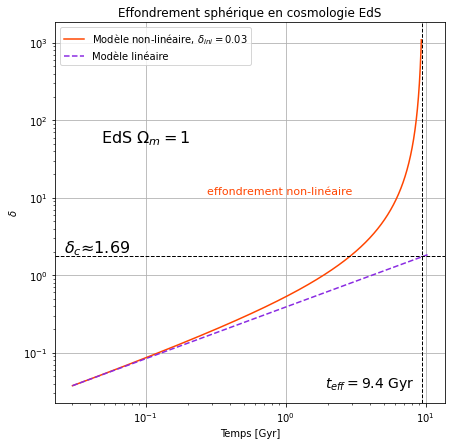

In [22]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.integrate 
from scipy import optimize




H0=2.2685455027664497e-18     # s^-1 
G=6.67e-11                    # SI


plt.figure(figsize=(7,7))


def solu_non_linéaire(j,t,G):

    r,y=j
    r_derive=(-4/(3*t))*r+(2/(3*t**2))*y*(1+y)+4*r**2/(3*(1+y))
    y_derive=r
    res=np.array([r_derive,y_derive])
    return(res)
t=np.linspace(0.03,9.312280649478943,100000)
y0=0.01/(0.2665)
r0=(2/(3*0.03))*y0
j0=np.array([r0,y0])
solu=scipy.integrate.odeint(solu_non_linéaire,j0,t,args=(G,))
r_derive,y_derive=solu.T
plt.xscale('log')
plt.yscale('log')
plt.plot(t,y_derive , label="Modèle non-linéaire, $\delta_{ini} = 0.03$", color='orangered',linewidth=1.5) 

def solu_linéaire(j,t,G):

    r,y=j
    r_derive=(-4/(3*t))*r+(2/(3*t**2))*y
    yy_derive=r
    res=np.array([r_derive,yy_derive])
    return(res)
t=np.linspace(0.03,10.312280649478943,100000)
y0=0.01/(0.2665)
r0=(2/(3*0.03))*y0
j0=np.array([r0,y0])
solu=scipy.integrate.odeint(solu_linéaire,j0,t,args=(G,))
r_derive,yy_derive=solu.T
plt.xscale('log')
plt.yscale('log')
plt.plot(t,yy_derive , '--', label="Modèle linéaire", color='blueviolet',linewidth=1.5) 
plt.grid()
plt.legend()
plt.axvline(x=9.4,linestyle ='--',color = 'black',linewidth=1)
#plt.axvline(x=5,linestyle ='-',color = 'c',linewidth=3)
plt.axhline(y=1.755,linestyle ='--',color = 'black',linewidth=1)
#plt.axhline(y=4.55,linestyle ='-',color = 'c',linewidth=3)
plt.text(0.90,12,"effondrement non-linéaire",horizontalalignment = 'center', verticalalignment = 'center',color = 'orangered',fontsize = 11)
plt.text(0.4500e-1,2.27,"$\delta_{c} ≈ 1.69$",horizontalalignment = 'center', verticalalignment = 'center',color = 'black',fontsize = 16)
plt.xlabel("Temps [Gyr]")
plt.ylabel("$\delta$")
plt.text(1e-1,0.6e2,"EdS $\Omega_{m} = 1 $",horizontalalignment = 'center', verticalalignment = 'center',color = 'black',fontsize = 16)
plt.text(4,40e-3,"$t_{eff} = 9.4$ Gyr",horizontalalignment = 'center', verticalalignment = 'center',color = 'black',fontsize = 14)

plt.title("Effondrement sphérique en cosmologie EdS")











plt.show()



Cette valeur de la surdensité critique $\delta_{c}$ permet de faire le pont entre la solution non-linéaire complexe et la solution linéaire simple. Si l’évolution linéaire prédit que la surdensité vaut $\delta_{lineaire} = \delta_{c}$ alors on sait que le calcul non-linéaire aurait prédit une densité infinie, c’est à dire que la galaxie ou l’amas ce serait formé. Cette grandeur est la quantité clé qui entre dans les calculs analytiques pour prédire l’abondance des galaxies et amas de galaxies dans l’Univers (Théorie de Press-Schechter). Nous verrons cela dans la suite du notebook jupyter. 

# Surdensité du Viriel : un cas réaliste d'effondrement : 
----------------------------------------------------------

Un effondrement $\delta \longrightarrow +\infty$ n'est évidemment pas réaliste. En réalité, la sphère de matière qui s'éffondre va atteindre un état d'équilibre pour une certaine valeur de la surdensité : la surdensité du viriel. 

On peut utiliser la paramétrisation suivante : 

\begin{equation}
   \begin{cases}
      r(t) = A (1-\cos(\theta))  \\
      t = B (\theta - \sin(\theta))\\
   \end{cases}
\end{equation} 

Où A et B sont des constante, r représente le l'évolution du rayon d'une sphère de matière avec la paramétrisation en $\theta$ (Cycloïdes) et t le paramètre temporelle. La sphère s'effondre donc quand r = 0 c'est à dire pour $\theta = 2 \pi$.

On peut ainsi écrire l'expression de $\delta$ en fonction de $\theta$, On montre facilement que dans une cosmologie EdS, l'expression est : 

\begin{equation}
      \delta = \frac{9}{2} \frac{(\theta - \sin(\theta))^{2}}{(1-\cos(\theta))^{3}}
\end{equation} 

Ainsi, $\delta$ est max pour $\theta = 2 \pi$ et donc $\delta^{max} = 4.55$.
Finalement, on peut montrer que l'effondrement a lieu pour $\delta = \delta^{Vir}$ = $32 (1+\delta^{max})$ - 1

**On a donc $\Delta_{Vir} = \delta^{Vir}$ = 176.6 dans une cosmologie EdS.**



On cherche l'évolution du rayon de la sphère de matière : 
Comme $M$ = $\rho V$ = $\frac{4}{3} \rho \pi r^{3}$ alors $r(t)$ = $(\frac{3 M}{4 \pi \bar\rho_{m} (1+\delta(t))})^{\frac{1}{3}}$. 

Ainsi, en exprimant $\bar\rho_{m}$ en fonction du temps et en implémentant l'évolution de $\delta$ calculé auparavant, on peut tracer l'évolution du rayon d'un halo de matière qui s'effondre dans un Univers en expansion. 

Comme indiqué dans l'expréssion précédante, r(t) dépend de M. Calculerons l'évolution du rayon pour une masse finale d'environ $10^{14}.M_{Soleil}$, ceci équivaut à la masse d'un amas de galaxies. 

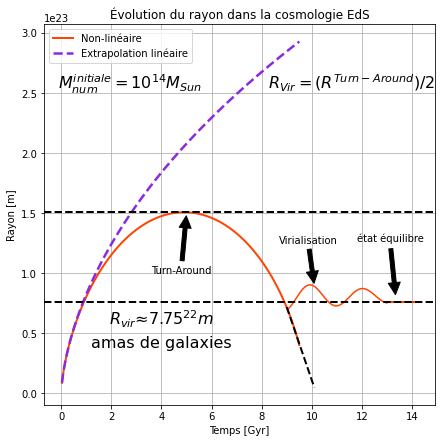

In [23]:

plt.figure(figsize=(7,7))

M=4.20e14*1.989e+30  # Masse d'une centaines de galaxies
def Rayon(t):
    return (4.5*2.10489111e23*M*(t**2)/((1+y_derive)))**(1/3)
t=np.linspace(0.03,9.5,100000)

#plt.annotate('Turn-Around', xy=(7.2,8.5e+22),xytext = (11,8.6e+22),arrowprops=dict(facecolor='red', shrink=0.05) )
plt.plot(t,Rayon(t),color='orangered',label = 'Non-linéaire',linewidth=2)
plt.title("Évolution du rayon dans la cosmologie EdS")
plt.xlabel("Temps [Gyr]")
plt.ylabel("Rayon [m]")
plt.grid()


def RayonLin(t):
    return (4.5*2.10489111e23*M*(t**2)/((1+yy_derive)))**(1/3)
t=np.linspace(0.03,9.5,100000)

#plt.annotate('Turn-Around', xy=(7.2,8.5e+22),xytext = (11,8.6e+22),arrowprops=dict(facecolor='red', shrink=0.05) )
plt.plot(t,RayonLin(t), '--',color='blueviolet',label ='Extrapolation linéaire',linewidth=2.5)
plt.legend()

def Ray(t):
    return np.sin(-3*t)*9.5e+23/t**2+0.8075e23 
t=np.linspace(9.05,13,1000)
plt.plot(t,Ray(t), color="orangered",linewidth=1.5 )
plt.annotate('Virialisation', xy=(10.10,0.90e+23 ),xytext = (8.70,1.25e23),arrowprops=dict(facecolor='black', shrink=0.05) )
plt.annotate('état équilibre', xy=(13.35,0.80e+23 ),xytext = (11.8,1.26e23),arrowprops=dict(facecolor='black', shrink=0.05) )
plt.annotate('Turn-Around', xy=(5,1.5e+23 ),xytext = (3.6,1e23),arrowprops=dict(facecolor='black', shrink=0.05) )
def p(t):
    
    return 0.7575e23 
t=np.linspace(13,14.2,1000)
plt.plot(t,np.full(t.shape, p(t)), color='orangered',linewidth=2 )

# lightcoral dodgerblue
plt.axhline(y=1.514e23,linestyle ='--',color = 'black',linewidth=2)

plt.axhline(y=0.7575e23,linestyle ='--',color = 'black',linewidth=2)
#plt.axvline(x=8.9,linestyle ='--',color = 'darkorange',linewidth=1.5)

def droite(u):
    return -0.609e23*u+6.20e23
u = np.linspace(9,10.1,10000)
plt.plot(u,droite(u), '--',c = 'black',linewidth= 2)
plt.text(4,0.62e23,"$R_{vir} ≈ 7.75^{22}m$",horizontalalignment = 'center', verticalalignment = 'center',color = 'black',fontsize = 16)
plt.text(4,0.42e23,"amas de galaxies",horizontalalignment = 'center', verticalalignment = 'center',color = 'black',fontsize = 16)
plt.text(2.75,2.58e23,"$M_{num}^{initiale} = 10^{14} M_{Sun}$",horizontalalignment = 'center', verticalalignment = 'center',color = 'black',fontsize = 16)
plt.text(11.6,2.58e23,"$R_{Vir} = (R^{Turn-Around})/2$",horizontalalignment = 'center', verticalalignment = 'center',color = 'black',fontsize = 16)
plt.show() 






Nous avons initialement choisis une masse qui équivaut à la masse d'un amas de galaxies ($M_{num}^{initiale} = 10^{14} M_{Sun}$) et nous avons finalement une structure qui s'effondre au rayon du viriel :  $$R_{Vir} = 7.75.10^{22}m$$ ce qui équivaut bien au rayon moyen d'un amas d'une centaines de galaxies..On retombe sur nos pattes ! 

# Effondrement dans la cosmologie $\Lambda$CDM, comparaison avec la cosmologie EdS. 
-------------------------------------------------------------------------------------

On va refaire le travail, cette fois-ci en considérant que la sphère de matière évolue dans un Univers de matière et d'énergie-noire. 

On considère l'équation d'évolution de la surdensité vue au début : 
\begin{equation}
   \ddot \delta + 2 H(t) \dot \delta = 4 \pi G \bar\rho_{m} (1+\delta) + \frac{4}{3} \frac{\dot \delta^{2}}{1+\delta}
\end{equation}

Cette fois ci, H(t) ne s'écrit plus simplement $\frac{2}{3 t}$, on utilise l'équation de Friedmann-Lemaitre pour calculer l'évolution du facteur d'échelle dans un Univers de matière + énergie-noire. La solution s'écrit : $$a(t) = \frac{1}{b^{\frac{1}{3}}} sinh^{\frac{2}{3}}(\frac{3}{2}H_{0}\sqrt{\Omega_{\Lambda}}(t-t_{0}))$$
H(t) s'écrit ainsi : $$H(t) = \frac{\dot a(t)}{a(t)} = (\frac{H_{0} \sqrt{\Omega_{\Lambda}}}{\tanh(\frac{3}{2}H_{0}\sqrt{\Omega_{\Lambda}}(t-t_{0})})$$

Finalement, l'équation à résoudre s'écrit : 

$$\ddot \delta = \frac{2 \Omega_{m}}{3 t^{2}} \delta (1+\delta) + \frac{4}{3} \frac{\dot \delta^{2}}{1+\delta} -  (\frac{2 H_{0} \sqrt{\Omega_{\Lambda}}}{\tanh(\frac{3}{2}H_{0}\sqrt{\Omega_{\Lambda}}(t-t_{0})}) \dot \delta$$
$$t_{0} = -\frac{2}{3 H_{0} \sqrt{\Omega_{\Lambda}}} arcsinh(\sqrt{b})$$
$$b = \frac{\Omega_{\Lambda}}{\Omega_{m}} $$
$$ \Omega_{m} = 0.3, \Omega_{\Lambda} = 0.7 $$
      
Remarque : Cette équation d'évolution est identique à celle obtenue dans la cosmologie EdS, sauf pour la partie reliée au terme de friction (le terme en $\dot \delta$). Ce terme va donc contenir tout ce qui explique les différences entre les 2 cosmologies. Ce terme est un terme de friction, on remarque qu'il porte le signe '-', ainsi, ce terme est le seul à oeuvrer contre une évolution positive de la surdensité, ce terme va donc freiner l'effondrement. Essayons de déterminer à l'avance, dans quel cosmologie (EdS ou $\Lambda$CDM) le freinage sera plus important, pour cela, tracons l'évolution de ce terme dans les deux cosmologies. 


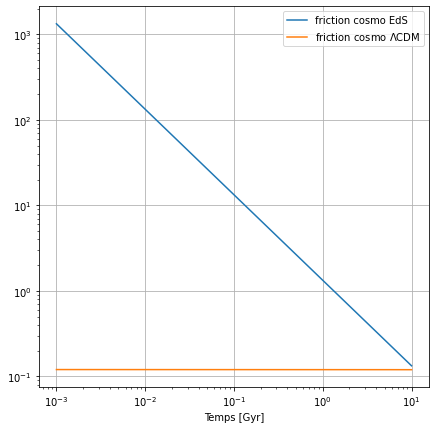

In [12]:
plt.figure(figsize=(7,7))

G=6.67e-11                     # SI
H00 = 0.07166                  # Gyr^-1
wm = 0.3
wlamb = 0.7 
bsq = np.sqrt(wlamb/wm)
t0 = (-2*np.arcsinh(bsq))/H00

def evol_EdS(t):
    return 4/(3*t)

def evol_LCDM(t):
    return (2*H00*np.sqrt(wlamb))/(np.tanh((3*H00*np.sqrt(wlamb)*(t-t0))/2))
t = np.linspace(0.001,10,10000)
plt.plot(t, evol_EdS(t),label = 'friction cosmo EdS')
plt.plot(t, evol_LCDM(t), label = 'friction cosmo $\Lambda$CDM')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid()
plt.xlabel("Temps [Gyr]")
plt.show()





Ainsi, le terme de friction dans la cosmologie EdS est quasiment toujours plus grand de plusieurs ordres de grandeurs que celui de la cosmologie $\Lambda$CDM. Ceci induit que dans la cosmologie EdS, le terme qui oeuvre contre l'effondrement est plus important et que par consequent, dans la cosmologie EdS, l'effondrement est moins brutal que dans la cosmologie $\Lambda$CDM. 

Vérifions cela en calculant l'évolution de la surdensité, pour des conditions initiales identiques. 

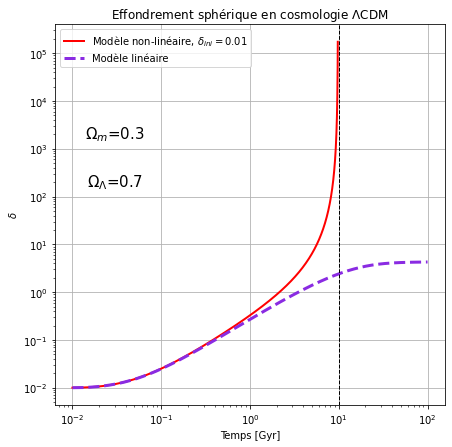

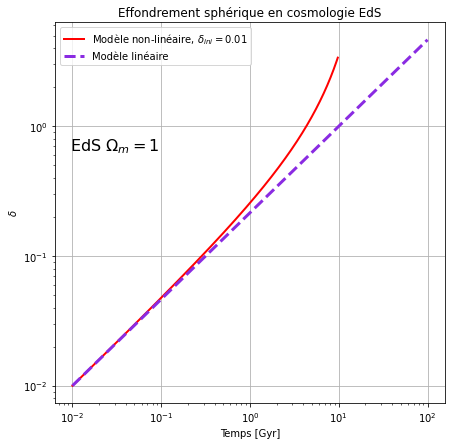

In [20]:
G=6.67e-11                    # SI
H0 = 0.07166                  # Gyr^-1
wm = 0.3
wlamb = 0.7 
bsq = np.sqrt(wlamb/wm)
t0 = (-2*np.arcsinh(bsq))/H0


plt.figure(figsize=(7,7))
def solu_non_linéaire(j,t,G):

    r,y=j
    r_derive=(-2*H0*np.sqrt(wlamb)/(np.tanh((3*H0*np.sqrt(wlamb)*(t-t0))/2)))*r+((2*wm)/(3*t**2))*y*(1+y)+4*r**2/(3*(1+y))
    y_derive=r
    res=np.array([r_derive,y_derive])
    return(res)
t=np.linspace(0.01,9.75,100000)
y0=0.01
ti = 0.01
r0=(y0*H0*np.sqrt(wlamb))/(np.tanh((3*H0*np.sqrt(wlamb)*(ti-t0))/2))
j0=np.array([r0,y0])
solu=scipy.integrate.odeint(solu_non_linéaire,j0,t,args=(G,))
r_derive,y_derive=solu.T
plt.xscale('log')
plt.yscale('log')
plt.plot(t,y_derive , label="Modèle non-linéaire, $\delta_{ini} = 0.01$", color='red',linewidth=2) 

def solu_linéaire(j,t,G):

    r,y=j
    r_derive=(-2*H0*np.sqrt(wlamb)/(np.tanh((3*H0*np.sqrt(wlamb)*(t-t0))/2)))*r+((2*wm)/(3*t**2))*y
    yy_derive=r
    res=np.array([r_derive,yy_derive])
    return(res)
t=np.linspace(0.01,100,100000)
y0=0.01
r0=(y0*H0*np.sqrt(wlamb))/(np.tanh((3*H0*np.sqrt(wlamb)*(ti-t0))/2))
j0=np.array([r0,y0])
solu=scipy.integrate.odeint(solu_linéaire,j0,t,args=(G,))
r_derive,yy_derive=solu.T
plt.xscale('log')
plt.yscale('log')
plt.plot(t,yy_derive , '--', label="Modèle linéaire", color='blueviolet',linewidth=3) 

plt.legend()
plt.axvline(x=10,linestyle ='--',color = 'black',linewidth=1)
#plt.axhline(y=1.66,linestyle ='--',color = 'black',linewidth=1)
#plt.text(3e-2,4.5,"$\delta_{c} ≈ 2.35$",horizontalalignment = 'center', verticalalignment = 'center',color = 'black',fontsize = 16)
plt.xlabel("Temps [Gyr]")
plt.ylabel("$\delta$")
plt.title("Effondrement sphérique en cosmologie $\Lambda$CDM")
plt.text(3e-2,20e2, '$\Omega_{m}$='+str(wm),horizontalalignment = 'center', verticalalignment = 'center',color = 'black',fontsize = 15)
plt.text(3e-2,2e2, '$\Omega_{\Lambda}$='+str(wlamb),horizontalalignment = 'center', verticalalignment = 'center',color = 'black',fontsize = 15)
plt.grid()
plt.show()

plt.figure(figsize=(7,7))

def solu_non_linéaireEDS(j,t,G):

    r,y=j
    r_derive=(-4/(3*t))*r+(2/(3*t**2))*y*(1+y)+4*r**2/(3*(1+y))
    y_derivee=r
    res=np.array([r_derive,y_derivee])
    return(res)
t=np.linspace(0.01,9.75,100000)
y0=0.01
ti = 0.01
r0=(2/(3*ti))*y0
j0=np.array([r0,y0])
solu=scipy.integrate.odeint(solu_non_linéaireEDS,j0,t,args=(G,))
r_derive,y_derivee=solu.T
plt.xscale('log')
plt.yscale('log')
plt.plot(t,y_derivee , label="Modèle non-linéaire, $\delta_{ini} = 0.01$", color='red',linewidth=2) 

def solu_linéaireEDS(j,t,G):

    r,y=j
    r_derive=(-4/(3*t))*r+(2/(3*t**2))*y
    yy_derivee=r
    res=np.array([r_derive,yy_derivee])
    return(res)
t=np.linspace(0.01,100,100000)
y0=0.01
ti = 0.01
r0=(2/(3*ti))*y0
j0=np.array([r0,y0])
solu=scipy.integrate.odeint(solu_linéaireEDS,j0,t,args=(G,))
r_derive,yy_derivee=solu.T
plt.xscale('log')
plt.yscale('log')
plt.plot(t,yy_derivee , '--', label="Modèle linéaire", color='blueviolet',linewidth=3) 
plt.grid()
plt.legend()
plt.xlabel("Temps [Gyr]")
plt.ylabel("$\delta$")
plt.text(3e-2,0.7,"EdS $\Omega_{m} = 1 $",horizontalalignment = 'center', verticalalignment = 'center',color = 'black',fontsize = 16)
plt.title("Effondrement sphérique en cosmologie EdS")
plt.show()



Pour des conditions initiales identiques, la surdensité dans la cosmologie $\Lambda$CDM s'éffondre ($\delta \longrightarrow +\infty$,  pour $t \longrightarrow 10$ Gyr) alors que dans la cosmologie EdS, $\delta \approx 1-10$ pour t = 1O Gyr, et donc pas d'effondrement. On peut d'ailleurs montrer que $\Delta_{Vir} \approx 350$ dans la cosmologie $\Lambda$CDM ($\Delta_{Vir} \approx 177$ dans EdS).\
**Ainsi, la présence d'energie-noire semble accélérer l'effondrement sphérique...** 

# Théorie de Press-Schechter : Une sonde cosmologique
-----------------------------------------------------


Comment prédire, à partir de l’effondrement **sphérique**, la fonction de masse des halos de matière noire dans l’Univers ?

**•** Selon Press-Schechter (1974) : "La fraction de masse de l’Univers dans des halos de masse supérieure à M, F(>M), est donnée par la fraction des fluctuations de densité dans le champ initial (lissé à une échelle M et extrapolé linéairement au redshift d’intérêt) qui dépasse le seuil $\delta_{c}$" 

\begin{equation}
   F(>M) = \int_{\delta_{c}}^{\infty} \frac{1}{2 \pi} \exp(-\frac{\delta^{2}}{2 \sigma(M)^{2}}) \frac{d\delta}{\sigma(M)}
\end{equation}

où $\sigma(M)$ est l’écart type des fluctuations du champs de densité initial lissé à une échelle R (ou M) : 


\begin{equation}
   \sigma(M) = \frac{1}{2 \pi^{2}} \int_{0}^{\infty} dk k^{2} P(k) W_{M}(k)
\end{equation}

où P(k) est le spectre de puissance de la matière, on le prendra de la forme $k^{n}$ avec $n \in$ [1,-3]) et W(kR) est la fonction fenêtre qui permet de lisser le champ primordial de densité à une échelle R ou M (on prendra un filtre simple, de type "sharp-k"). 

En posant $\delta$ = x $\sigma_{M}$, on peut réécrire l'intégrale donnant F(>M) ainsi : 

\begin{equation}
   F(>M) = \sqrt\frac{2}{\pi} \int_{\frac{\delta_{c}}{\sigma_{M}}}^{\infty} \exp(-\frac{x^{2}}{2}) dx
\end{equation}

Et en utilisant la relation : $\frac{d}{dM} \int_{\frac{\delta_{c}}{\sigma_{M}}}^{\infty} f(x)dx$ = f($\frac{\delta_{c}}{\sigma_{M}}$) $\frac{d(\frac{\delta_{c}}{\sigma_{M}})}{dM}$ on peut réécrire de façon simple dF/dM. 

Le nombre d'Halos par unité de masse est donné par : 

\begin{equation}
   \frac{dn(M)} {dM} = \frac{<\rho>} {M}\frac{dF(>M)}{dM}
\end{equation}

Qui se réécrit finalement : 

\begin{equation}
   \frac{dn(M)} {dM} = \frac{<\rho>} {M^{2}} \sqrt\frac{2}{\pi} \frac{n+3}{6} (\frac{M}{M_{*}})^{\frac{n+3}{6}} exp ({-\frac{1}{2} (\frac{M}{M_{*}})^{\frac{n+3}{3}}})
\end{equation}

Où $M_{*}$ est la masse qui détermine la "coupure exponentielle", de telle sorte que les structures s'effondrenent, c'est à dire tel que $\sigma(M_{*}) = \delta_{c}$. 

$M_{*} = M_{8} (\frac{\sigma_{8}}{\delta_{c}})^{\frac{3}{n+3}}$ où $M_{8}$ représente la masse contenue dans une sphère de 8 Mpc de rayon.

$M_{8} = \frac{4}{3} \pi \Omega_{m} \rho_{c}^{0} R_{8}^{3}$ avec $R_{8}$ = 8 (Mpc/h),  $\Omega_{m}$ = 0.3, $\sigma_{8}$ = 0.8, et $\delta_{c} = 1.686$, $\rho_{c}^{0} = 2.775x10^{11}$ $(M_{Sun}/h)/(Mpc/h)^{3}$ la densité critique.  

En pratique, on plot le nombre d'Halos par intervalle logarithmique de M, à savoir : 

\begin{equation}
   M \frac{dn(M)} {dM} = \frac{dn(M)} {dlog(M)} = \frac{\Omega_{m} \rho_{c}^{0}} {M} \sqrt\frac{2}{\pi} \frac{n+3}{6} (\frac{M}{M_{*}})^{\frac{n+3}{6}} exp ({-\frac{1}{2} (\frac{M}{M_{*}})^{\frac{n+3}{3}}})
\end{equation}

**On plot le résultat pour une valeur de l'indice spectral n = -2, cosmologie EdS.**

0.0003520349235940361
19073924646037.543
170136430695.3488


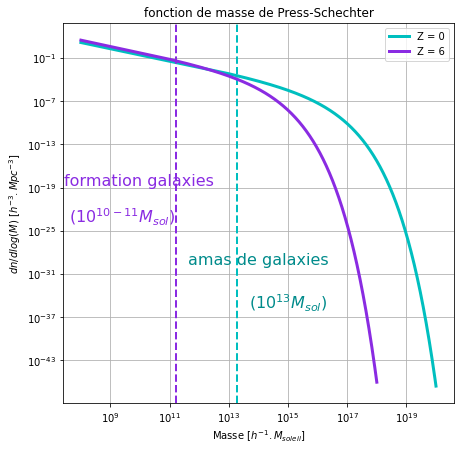

In [33]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.integrate 
from scipy import optimize


pco = 2.775e11           # densité critique exprimée en Mpc
om = 0.3                 # proportion de matière           
pi2 = np.sqrt(2/np.pi)
a = pco*om*pi2
sigma8 = 0.8             # écart-type des fluctuations, échelle de 8 Mpc
deltac = 1.686           # surdesnité critique calculée plus haut
R8 = 8              
M8 = (om*pco*4*np.pi*R8**(3))/(3)

n = -2                   # indice spectral du spectre de puissance 

plt.figure(figsize=(7,7))

Mstar = M8*(sigma8/deltac)**(3/(n+3))

def dn(M):
    return (np.exp(-0.5*(M/Mstar)**((n+3)/3))*a*((n+3)/6)*(M/Mstar)**((n+3)/6))/M
M = np.linspace(1e8,1e20,10000000)
plt.xscale('log')
plt.yscale('log')

plt.plot(M,dn(M),color = 'c',linewidth=3,label = 'Z = 0')

plt.title("fonction de masse de Press-Schechter")
plt.xlabel("Masse [$h^{-1}.M_{soleil}$]")
plt.ylabel("$dn/dlog(M)$ [$h^{-3}.Mpc^{-3}$]")
plt.axvline(x=18938808800736.336,linestyle ='--',color = 'c',linewidth=2)
plt.axvline(x=169532753588.238,linestyle ='--',color = 'blueviolet',linewidth=2)

M8z = (om*pco*4*np.pi*R8**(3))/(3*7**(3))
Mstarz = M8z*(sigma8/deltac)**(3/n+3)

def dn1(M):
    return (np.exp(-0.5*(M/Mstarz)**((n+3)/3))*a*((n+3)/6)*(M/Mstarz)**((n+3)/6))/M
M = np.linspace(1e8,1e18,10000000)
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.plot(M,dn1(M),color = 'blueviolet',linewidth=3,label = 'Z = 6')
plt.legend(loc = 'best')


plt.text(10e13,10e-30,"amas de galaxies",horizontalalignment = 'center', verticalalignment = 'center',color = 'darkcyan',fontsize = 16)
plt.text(10e14,10e-36,"($10^{13} M_{sol}$)",horizontalalignment = 'center', verticalalignment = 'center',color = 'darkcyan',fontsize = 16)

plt.text(92e8,80e-20,"formation galaxies",horizontalalignment = 'center', verticalalignment = 'center',color = 'blueviolet',fontsize = 16)
plt.text(25e8,92e-25,"($10^{10-11} M_{sol}$)",horizontalalignment = 'center', verticalalignment = 'center',color = 'blueviolet',fontsize = 16)




print(dn(Mstar))   # 3.5E-4
print(Mstar)
print(Mstarz)

Formation hierarchique des grandes structures 
-----------------------------------------------

On forme ainsi, environ $3.5x10^{-4}$ amas /$(Mpc/h)^{3}$. 

Cette valeur de la fonction de masse est, en ordre de grandeur, compatible avec des estimations plus précises (issues de simulations numériques ou de prédictions plus précises) qui peuvent, elles, être comparées aux observations pour contraindre la cosmologie. On note que la fonction de masse dépend principalement de $\sigma_{8}$ et de $\Omega_{m}$. En ce sens, la fonction de masse constitue une sonde cosmologique. 

Pour aller plus loin, il faudrait notamment prendre en compte le caractère non sphérique de l’effondrement, son caractère stochastique, sa dépendance cosmologique et le lien avec les observations (volume, fonction de sélection, relation masse-observable,...). Cela permettrait d’obtenir en combinant aux futures observations des contraintes cosmologiques plus robustes sur la distribution et le contenu énergétique des composantes de l’univers ainsi que sur les lois qui régissent leur évolution...